In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Gerekli kütüphaneleri yüklüyoruz
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

# 1. ADIM: Google Drive'ı Colab'e bağlama
# Bu hücreyi çalıştırdığınızda sizden bir izin isteyecek, onaylayın.
from google.colab import drive
drive.mount('/content/drive')

# 2. ADIM: Veri Setinizin Yolunu Belirtme
# LÜTFEN 'PLANT_CARE_AI/1_TUR_TANIMA_EGITIM_VERISETI' kısmını
# kendi Drive'ınızdaki doğru klasör yolu ile değiştirin.
# Drive'da klasöre sağ tıklayıp "Yolu kopyala" diyebilirsiniz.
base_dir = '/content/drive/MyDrive/PLANT_CARE_AI/1_TUR_TANIMA_EGITIM_VERISETI'

# Kontrol için klasördeki bitki türlerinden birkaçını yazdıralım
print("Klasördeki bazı bitki türleri:")
print(os.listdir(base_dir)[:5])
print("-" * 30)


# 3. ADIM: Veri Hazırlama ve Artırma (Data Augmentation)
# Fotoğrafları yapay zekanın anlayacağı formata getiriyoruz.
# Aynı zamanda fotoğrafları rastgele döndürerek, zoom yaparak çoğaltıyoruz
# ki modelimiz daha iyi öğrensin.
# Veri setinin %20'sini test/doğrulama için ayırıyoruz.
datagen = ImageDataGenerator(
    rescale=1./255,            # Piksel değerlerini 0-1 arasına çek
    rotation_range=40,         # Rastgele 40 derece döndür
    width_shift_range=0.2,     # Yatayda rastgele kaydır
    height_shift_range=0.2,    # Dikeyde rastgele kaydır
    shear_range=0.2,           # Görüntüyü yana yatır
    zoom_range=0.2,            # Rastgele zoom yap
    horizontal_flip=True,      # Yatayda rastgele çevir
    fill_mode='nearest',       # Oluşan boşlukları en yakın pikselle doldur
    validation_split=0.2       # Verinin %20'sini doğrulama için ayır
)

# Eğitim verilerini hazırlama
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),    # Tüm fotoğrafları 150x150 piksel yap
    batch_size=32,
    class_mode='categorical',
    subset='training'          # Bu kısım eğitim verisi
)

# Doğrulama (validation) verilerini hazırlama
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'        # Bu kısım doğrulama verisi
)

# Kaç tane sınıf (bitki türü) olduğunu bulalım
num_classes = len(train_generator.class_indices)
print(f"Toplam {num_classes} adet bitki türü bulundu.")
print("-" * 30)


# 4. ADIM: Yapay Zeka Modelini Oluşturma (CNN Mimarisi)
model = Sequential([
    # 1. Katman: Görüntüdeki temel özellikleri (kenarlar, köşeler) öğrenir
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    # 2. Katman: Daha karmaşık desenleri öğrenir
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # 3. Katman: Daha da karmaşık desenleri öğrenir
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Öğrenilen desenleri tek bir vektöre dönüştürme
    Flatten(),

    # Aşırı öğrenmeyi (ezberlemeyi) engellemek için Dropout katmanı
    Dropout(0.5),

    # Karar verme katmanları
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax') # Çıktı katmanı: Sınıf sayısı kadar nöron
])

# Modelin özetini görelim
model.summary()
print("-" * 30)


# 5. ADIM: Modeli Derleme
# Modelin nasıl öğreneceğini belirliyoruz
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6. ADIM: Modeli Eğitme
# Bu adım, veri setinizin büyüklüğüne göre zaman alacaktır (15-45 dakika arası)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size, # Her epoch'da kaç adım atılacağı
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25, # Veri setinin üzerinden 25 defa geçerek öğren
    verbose=1
)

# 7. ADIM: Eğitilmiş Modeli Kaydetme
# Bu en önemli adım. Eğittiğimiz modeli daha sonra kullanmak için kaydediyoruz.
model.save('/content/drive/MyDrive/PLANT_CARE_AI/modul_A_tur_tanima.h5')

print("-" * 30)
print("Tebrikler! Tür Tanıma Modeliniz eğitildi ve 'modul_A_tur_tanima.h5' adıyla Drive'ınıza kaydedildi.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Klasördeki bazı bitki türleri:
['Calathea', 'Areca Palm (Dypsis lutescens)', 'Bird of Paradise (Strelitzia reginae)', 'Asparagus Fern (Asparagus setaceus)', 'Cast Iron Plant (Aspidistra elatior)']
------------------------------
Found 11715 images belonging to 47 classes.
Found 2905 images belonging to 47 classes.
Toplam 47 adet bitki türü bulundu.
------------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 47)             │        24,111 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,057,775 (72.70 MB)

 Trainable params: 19,057,775 (72.70 MB)

 Non-trainable params: 0 (0.00 B)

------------------------------
Epoch 1/25
 24/366 ━━━━━━━━━━━━━━━━━━━━ 1:24:12 15s/step - accuracy: 0.0286 - loss: 4.0426

KeyboardInterrupt: 

In [ ]:
# Modelin eğitim sırasında kullandığı doğrulama veri setini (validation_generator) kullanarak
# nihai skorları hesaplayalım.

print("Modelin doğrulama verileri üzerindeki performansı değerlendiriliyor...")
loss, accuracy = model.evaluate(validation_generator)

print("-" * 30)
print(f"Doğrulama Kayıp (Loss) Değeri: {loss:.4f}")
print(f"Doğrulama Başarı (Accuracy) Oranı: {accuracy:.4f}")
print(f"Model, daha önce görmediği bitki fotoğraflarını yaklaşık %{accuracy * 100:.2f} oranında doğru tahmin ediyor.")

In [ ]:
# Gerekli kütüphaneleri yüklüyoruz
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2 # Daha güçlü, önceden eğitilmiş bir model kullanıyoruz
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import os

# 1. ADIM: Google Drive'ı Colab'e bağlama (Aynı)
from google.colab import drive
drive.mount('/content/drive')

# 2. ADIM: Veri Setinizin Yolunu Belirtme (Aynı)
base_dir = '/content/drive/MyDrive/PLANT_CARE_AI/1_TUR_TANIMA_EGITIM_VERISETI'

# 3. ADIM: Veri Hazırlama ve Artırma (Data Augmentation)
# DİKKAT: target_size'ı önceden eğitilmiş modelin standart boyutu olan 224x224'e çıkarıyoruz.
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input, # MobileNetV2 için özel ön işleme
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224), # YENİ BOYUT
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224), # YENİ BOYUT
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

num_classes = len(train_generator.class_indices)
print(f"Toplam {num_classes} adet bitki türü bulundu.")
print("-" * 30)

# 4. ADIM: YENİ NESİL MODELİ OLUŞTURMA (TRANSFER LEARNING)
# Milyonlarca resimle eğitilmiş MobileNetV2 modelini temel olarak alıyoruz.
# 'include_top=False' diyerek, modelin kendi sınıflandırma katmanını atıyoruz.
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Temel modelin katmanlarını donduruyoruz. Onların öğrendiği bilgiler zaten çok iyi, tekrar eğitmiyoruz.
base_model.trainable = False

# Şimdi kendi sınıflandırıcımızı temel modelin üzerine ekliyoruz
x = base_model.output
x = GlobalAveragePooling2D()(x) # Özellik haritalarını basitleştirir
x = Dense(1024, activation='relu')(x) # Kendi karar verme katmanımız
x = Dropout(0.5)(x) # Ezberlemeyi önlemek için
predictions = Dense(num_classes, activation='softmax')(x) # Kendi çıktı katmanımız (47 bitki türü için)

# İki parçayı birleştirerek yeni modelimizi oluşturuyoruz
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()
print("-" * 30)


# 5. ADIM: Modeli Derleme (Düşük Öğrenme Oranı ile)
# Transfer öğrenmesinde daha düşük bir öğrenme oranıyla başlamak genellikle daha iyi sonuç verir.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6. ADIM: Modeli Eğitme
# GPU'nun aktif olduğundan emin olun! (Çalışma Zamanı -> Çalışma zamanı türünü değiştir -> GPU)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15, # İlk aşamada 15 epoch yeterli olabilir. Sonuçlara göre artırılabilir.
    verbose=1
)

# 7. ADIM: Eğitilmiş Modeli Kaydetme
model.save('/content/drive/MyDrive/PLANT_CARE_AI/modul_A_tur_tanima_v2.h5')

print("-" * 30)
print("Tebrikler! Yeni Nesil Tür Tanıma Modeliniz eğitildi ve 'modul_A_tur_tanima_v2.h5' adıyla kaydedildi.")

# BONUS: Skorları ve grafiği görelim
loss, accuracy = model.evaluate(validation_generator)
print(f"Modelin nihai doğruluk oranı: %{accuracy * 100:.2f}")

In [ ]:
# --- İNCE AYAR (FINE-TUNING) AŞAMASI ---

# 1. ADIM: Temel Modelin Katmanlarını Eğitime Açma
# base_model değişkeni bir önceki hücreden hafızada duruyor.
base_model.trainable = True

# Temel modelde kaç katman olduğunu görelim
print("MobileNetV2 içindeki katman sayısı:", len(base_model.layers))

# Genellikle en baştaki katmanlar (kenar, köşe gibi en genel desenleri öğrenenler)
# dondurulur ve sadece üst katmanların eğitilmesine izin verilir.
# Modelin sonlarına doğru olan katmanları eğitime açalım.
fine_tune_at = 100 # İlk 100 katman donuk kalsın, gerisi eğitilsin.

# İlk 'fine_tune_at' katmanını dondur
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# 2. ADIM: Modeli ÇOK DÜŞÜK bir öğrenme oranı ile yeniden derleme
# Bu en kritik adımdır. Eğer öğrenme oranı yüksek olursa,
# modelin önceden öğrendiği değerli bilgiler bozulabilir.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001) # Öncekinden 10 kat daha düşük!

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary() # Eğitilebilir parametre sayısının arttığına dikkat edin.
print("-" * 30)
print("İnce ayar için model yeniden derlendi. Eğitim başlıyor...")

# 3. ADIM: Modeli İnce Ayar için Yeniden Eğitme
# İlk eğitim 15 epoch sürmüştü. Şimdi üzerine 10 epoch daha ekleyelim.
fine_tune_epochs = 10
total_epochs =  15 + fine_tune_epochs

history_fine = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1] # Eğitimin kaldığı yerden devam etmesini sağlar!
)

# 4. ADIM: İnce Ayar Yapılmış Modeli Kaydetme
model.save('/content/drive/MyDrive/PLANT_CARE_AI/modul_A_tur_tanima_v3_fine_tuned.h5')

print("-" * 30)
print("Tebrikler! İnce Ayar Yapılmış Modeliniz eğitildi ve '..._v3_fine_tuned.h5' adıyla kaydedildi.")

# BONUS: Son ve en yüksek skoru görelim
loss, accuracy = model.evaluate(validation_generator)
print(f"Modelin İNCE AYAR SONRASI nihai doğruluk oranı: %{accuracy * 100:.2f}")

In [ ]:
# --- MODÜL B: SEMPTOM TESPİTİ MODELİ EĞİTİM KODU ---

# Gerekli kütüphaneleri yüklüyoruz
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import os
from google.colab import drive

# 1. ADIM: Drive Bağlantısı
drive.mount('/content/drive')

# 2. ADIM: Veri Yolu (DİKKAT: Semptom klasörüne yönlendirdik)
base_dir = '/content/drive/MyDrive/PLANT_CARE_AI/2_SEMPTOM_TESPITI_EGITIM_VERISETI'

print("Veri seti kontrol ediliyor...")
if os.path.exists(base_dir):
    print(f"Klasör bulundu: {base_dir}")
    print("İçindeki sınıflar:", os.listdir(base_dir))
else:
    print("HATA: Klasör bulunamadı! Lütfen yolu kontrol edin.")

# 3. ADIM: Veri Hazırlama (MobileNetV2 standardına uygun 224x224)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Eğitim Verisi
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Doğrulama Verisi
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

num_classes = len(train_generator.class_indices)
print(f"\nToplam {num_classes} adet semptom sınıfı bulundu.")
print(train_generator.class_indices) # Hangi sınıfın hangi sayı olduğunu görelim
print("-" * 30)

# 4. ADIM: Modeli Kurma (Transfer Learning)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False # Temel bilgileri donduruyoruz

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 5. ADIM: Derleme
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6. ADIM: Eğitim Başlıyor
print("Modül B eğitimi başlıyor... (Tahmini süre: GPU ile 20-30 dk)")
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15, # İlk etapta 15 epoch yeterli
    verbose=1
)

# 7. ADIM: Kaydetme
save_path = '/content/drive/MyDrive/PLANT_CARE_AI/modul_B_semptom_tespiti.h5'
model.save(save_path)

print("-" * 30)
print(f"Modül B başarıyla eğitildi ve kaydedildi: {save_path}")

# Sonucu Görelim
loss, accuracy = model.evaluate(validation_generator)
print(f"Modül B Nihai Doğruluk Oranı: %{accuracy * 100:.2f}")

In [ ]:
# --- MODÜL B: İNCE AYAR (FINE-TUNING) AŞAMASI ---

print("İnce Ayar (Fine-Tuning) başlatılıyor...")

# 1. ADIM: Temel Modelin Kilidini Aç
# base_model değişkeni hafızada duruyor, onu kullanıyoruz.
base_model.trainable = True

# MobileNetV2'nin ilk 100 katmanını donduralım (temel özellikler bozulmasın)
# Sadece son katmanlar (ince detaylar) eğitilsin.
fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# 2. ADIM: Yeniden Derleme (Çok Düşük Öğrenme Oranı ile)
# DİKKAT: Öğrenme oranını (learning_rate) çok düşük tutuyoruz ki
# model bildiği her şeyi unutmasın, sadece hassaslaşsın.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001) # 1e-5

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()
print("-" * 30)
print("Model, ince detayları öğrenmek için hazır.")

# 3. ADIM: Eğitime Devam Etme
# Önceki eğitimin (history) bittiği yerden devam edeceğiz.
# 15 epoch yapmıştık, üzerine 15 tane daha ekleyelim.
fine_tune_epochs = 15
total_epochs =  15 + fine_tune_epochs

print(f"Eğitim {total_epochs} epoch'a tamamlanacak...")

history_fine = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1], # Kaldığı yerden devam et
    verbose=1
)

# 4. ADIM: Final Modeli Kaydetme
# İnce ayar yapılmış versiyonu farklı bir isimle kaydedelim.
save_path_v2 = '/content/drive/MyDrive/PLANT_CARE_AI/modul_B_semptom_tespiti_fine_tuned.h5'
model.save(save_path_v2)

print("-" * 30)
print(f"İnce Ayarlı Modül B kaydedildi: {save_path_v2}")

# Sonucu Görelim
loss, accuracy = model.evaluate(validation_generator)
print(f"Modül B İNCE AYAR SONRASI Nihai Skor: %{accuracy * 100:.2f}")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model

# 1. ADIM: "Temiz" Modeli Geri Yükle
# Ezberlemiş olan modeli değil, ilk eğittiğimiz (henüz bozulmamış) modeli geri çağırıyoruz.
print("Temiz model yükleniyor...")
model = load_model('/content/drive/MyDrive/PLANT_CARE_AI/modul_B_semptom_tespiti.h5')

# 2. ADIM: İnce Ayar Ayarları
base_model = model.layers[0] # MobileNetV2 katmanı
base_model.trainable = True

# İlk 100 katmanı dondur, gerisini aç
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Çok düşük öğrenme oranı
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. ADIM: SİHİRLİ DOKUNUŞ (CALLBACKS)
# Burası overfitting'i engelleyecek olan kısımdır.

# A) EarlyStopping: Eğer doğrulama kaybı (val_loss) 5 epoch boyunca düzelmezse eğitimi durdur.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True, # En iyi ağırlıkları geri yükle (EN ÖNEMLİSİ BU)
    verbose=1
)

# B) ModelCheckpoint: Sadece en iyi modeli kaydet.
checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/PLANT_CARE_AI/modul_B_en_iyi_model.keras', # .keras formatı daha güvenlidir
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# C) ReduceLROnPlateau: Eğer model takılırsa öğrenme hızını daha da düşür.
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

# 4. ADIM: Akıllı Eğitim Başlıyor
print("Akıllı İnce Ayar başlatılıyor...")
history_smart = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20, # Epoch sayısını artırabiliriz, çünkü EarlyStopping zaten durduracak.
    callbacks=[early_stopping, checkpoint, reduce_lr], # Bekçilerimizi ekledik
    verbose=1
)

# 5. ADIM: Gerçek Sonucu Görelim
loss, accuracy = model.evaluate(validation_generator)
print(f"Modül B (Akıllı İnce Ayar) Nihai Skor: %{accuracy * 100:.2f}")

In [ ]:
# --- MODÜL B: SIFIRDAN KURULUM VE AKILLI EĞİTİM (HEPSİ BİR ARADA) ---

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import tensorflow as tf
import os

# 1. ADIM: Modeli Sıfırdan İnşa Et
print("Model sıfırdan oluşturuluyor...")
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False # İlk başta donduruyoruz

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(8, activation='softmax')(x) # 8 Sınıfımız var

model = Model(inputs=base_model.input, outputs=predictions)

# 2. ADIM: İlk Isınma Eğitimi (Sadece Başlık Kısmı)
# Bu kısım, kayıp olan dosyanın yerini tutacak.
print("Aşama 1: Isınma Eğitimi Başlıyor (5 Epoch)...")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5, # Sadece 5 epoch yeterli, sonra ince ayara geçeceğiz
    verbose=1
)

# 3. ADIM: Akıllı İnce Ayar (Overfitting Engelleyici Kısım)
print("\nAşama 2: Akıllı İnce Ayar Başlatılıyor...")

# Kilidi Aç
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Düşük Öğrenme Oranı
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks (Bekçiler)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/PLANT_CARE_AI/modul_B_final_best.keras', # Yeni isim
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-7,
    verbose=1
)

# 4. ADIM: İnce Ayar Eğitimi
history_smart = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25, # EarlyStopping gerektiğinde durduracak
    callbacks=[early_stopping, checkpoint, reduce_lr],
    verbose=1
)

# 5. ADIM: Sonuç
loss, accuracy = model.evaluate(validation_generator)
print(f"\nModül B TAMAMLANDI - Nihai Skor: %{accuracy * 100:.2f}")

In [ ]:
# --- MODÜL B: VERİ YÜKLEME + SIFIRDAN MODEL KURULUMU + AKILLI EĞİTİM (TAM PAKET) ---

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Bu eksikti, ekledik
import tensorflow as tf
import os
from google.colab import drive

# 1. ADIM: Drive ve Veri Yolu Ayarları
drive.mount('/content/drive')
base_dir = '/content/drive/MyDrive/PLANT_CARE_AI/2_SEMPTOM_TESPITI_EGITIM_VERISETI'

# 2. ADIM: Veri Yükleyicileri (Generator) Tekrar Tanımlıyoruz
print("Veriler hazırlanıyor...")
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Sınıf sayısını otomatik al
num_classes = len(train_generator.class_indices)
print(f"Tespit edilen sınıf sayısı: {num_classes}")

# 3. ADIM: Modeli Sıfırdan İnşa Et
print("Model sıfırdan oluşturuluyor...")
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False # İlk başta donduruyoruz

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 4. ADIM: İlk Isınma Eğitimi (Sadece Başlık Kısmı - 5 Epoch)
print("\nAşama 1: Isınma Eğitimi Başlıyor (5 Epoch)...")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    verbose=1
)

# 5. ADIM: Akıllı İnce Ayar (Overfitting Engelleyici Kısım)
print("\nAşama 2: Akıllı İnce Ayar Başlatılıyor...")

# Kilidi Aç
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Düşük Öğrenme Oranı
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks (Bekçiler)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/PLANT_CARE_AI/modul_B_final_best.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-7,
    verbose=1
)

# 6. ADIM: İnce Ayar Eğitimi
history_smart = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25, # EarlyStopping gerektiğinde durduracak
    callbacks=[early_stopping, checkpoint, reduce_lr],
    verbose=1
)

# 7. ADIM: Sonuç
loss, accuracy = model.evaluate(validation_generator)
print(f"\nModül B TAMAMLANDI - Nihai Skor: %{accuracy * 100:.2f}")

In [ ]:
import shutil
import os

# Drive'daki klasör yolu (Senin mevcut yolun)
drive_path = '/content/drive/MyDrive/PLANT_CARE_AI/2_SEMPTOM_TESPITI_EGITIM_VERISETI'

# Colab'ın içindeki hızlı hafıza yolu (Yeni yolumuz)
local_path = '/content/veriseti_hizli'

print("Veriler Drive'dan Colab'ın hızlı hafızasına kopyalanıyor... (Bu biraz sürebilir, bekle)")

# Eğer daha önce kopyalamadıysak kopyala
if not os.path.exists(local_path):
    shutil.copytree(drive_path, local_path)
    print("Kopyalama tamamlandı! Artık eğitim çok hızlı olacak. 🚀")
else:
    print("Veriler zaten kopyalanmış. Devam edebilirsin.")

# YENİ VERİ YOLUMUZ ARTIK BU OLACAK
base_dir = local_path

In [ ]:
import shutil
import os
from google.colab import drive

# 1. ADIM: Önce Drive'ı Bağlıyoruz (Fişi takalım!)
drive.mount('/content/drive')

# 2. ADIM: Yolları Tanımlıyoruz
# Senin klasör yolun
drive_path = '/content/drive/MyDrive/PLANT_CARE_AI/2_SEMPTOM_TESPITI_EGITIM_VERISETI'
# Hızlı hafıza yolu
local_path = '/content/veriseti_hizli'

# Kontrol: Klasör gerçekten orada mı?
if not os.path.exists(drive_path):
    print(f"HATA: '{drive_path}' yolu bulunamadı!")
    print("Lütfen Drive'ındaki klasör ismini kontrol et.")
    print("PLANT_CARE_AI içindeki klasörler şunlar:")
    try:
        print(os.listdir('/content/drive/MyDrive/PLANT_CARE_AI'))
    except:
        print("Ana klasör bile okunamadı.")
else:
    print("Klasör bulundu, kopyalama başlıyor... (Bu biraz sürebilir, bekle)")

    # 3. ADIM: Kopyalama İşlemi
    if not os.path.exists(local_path):
        shutil.copytree(drive_path, local_path)
        print("✅ Kopyalama tamamlandı! Artık eğitim çok hızlı olacak. 🚀")
    else:
        print("✅ Veriler zaten daha önce kopyalanmış. Devam edebilirsin.")

# YENİ VERİ YOLUMUZ ARTIK BU OLACAK
base_dir = local_path

In [ ]:
import shutil
import os
from google.colab import drive

# 1. ADIM: Önce Drive'ı Bağlıyoruz (Fişi takalım!)
drive.mount('/content/drive')

# 2. ADIM: Yolları Tanımlıyoruz
# Senin klasör yolun
drive_path = '/content/drive/MyDrive/PLANT_CARE_AI/2_SEMPTOM_TESPITI_EGITIM_VERISETI'
# Hızlı hafıza yolu
local_path = '/content/veriseti_hizli'

# Kontrol: Klasör gerçekten orada mı?
if not os.path.exists(drive_path):
    print(f"HATA: '{drive_path}' yolu bulunamadı!")
    print("Lütfen Drive'ındaki klasör ismini kontrol et.")
    print("PLANT_CARE_AI içindeki klasörler şunlar:")
    try:
        print(os.listdir('/content/drive/MyDrive/PLANT_CARE_AI'))
    except:
        print("Ana klasör bile okunamadı.")
else:
    print("Klasör bulundu, kopyalama başlıyor... (Bu biraz sürebilir, bekle)")

    # 3. ADIM: Kopyalama İşlemi
    if not os.path.exists(local_path):
        shutil.copytree(drive_path, local_path)
        print("✅ Kopyalama tamamlandı! Artık eğitim çok hızlı olacak. 🚀")
    else:
        print("✅ Veriler zaten daha önce kopyalanmış. Devam edebilirsin.")

# YENİ VERİ YOLUMUZ ARTIK BU OLACAK
base_dir = local_path

In [ ]:
# --- MODÜL B PLAN C: EFFICIENTNET-B0 (HIZLANDIRILMIŞ VERSİYON) ---

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os
from google.colab import drive

# 1. Drive Bağlantısı (Modeli kaydetmek için lazım)
drive.mount('/content/drive')

# DİKKAT: ARTIK HIZLI KLASÖRÜ GÖSTERİYORUZ!
# Drive'ı değil, az önce kopyaladığımız yeri seçiyoruz.
base_dir = '/content/veriseti_hizli'

print(f"Eğitim şu klasörden yapılacak (Hızlı): {base_dir}")

# 2. Veri Hazırlama
print("Veriler EfficientNet için hazırlanıyor...")

# EfficientNet'in kendi özel ön işleme fonksiyonunu kullanıyoruz
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

num_classes = len(train_generator.class_indices)

# 3. Model Kurulumu: EFFICIENTNETB0
print(f"EfficientNetB0 Modeli {num_classes} sınıf için hazırlanıyor...")

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Son 20 katmanı eğitime açıyoruz (Fine-Tuning için)
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 4. Derleme
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Bekçiler (Modeli Drive'a kaydedecek, orası doğru)
callbacks = [
    # Eğer 5 epoch boyunca gelişme olmazsa dur:
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    # En iyi sonucu hemen kaydet:
    ModelCheckpoint('/content/drive/MyDrive/PLANT_CARE_AI/modul_B_efficientnet.keras', monitor='val_accuracy', save_best_only=True, verbose=1),
    # Takılırsan hızı düşür:
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7, verbose=1)
]

# 5. Eğitim
print("EfficientNet Eğitimi Başlıyor (Hızlı Mod)...")
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    callbacks=callbacks,
    verbose=1
)

# 6. Sonuç
loss, accuracy = model.evaluate(validation_generator)
print(f"\nEfficientNet Nihai Skor: %{accuracy * 100:.2f}")


In [ ]:
# --- MODÜL B PLAN D: SABIRLI EĞİTİM (ACCURACY ODAKLI) ---

# Model yapısını koruyoruz, sadece eğitim kurallarını (compile ve callbacks) değiştiriyoruz.

# 1. Derleme (Compile)
# Öğrenme hızını (Learning Rate) biraz daha düşürelim ki model daha emin adımlarla ilerlesin.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001) # 1e-4 yerine 1e-5 yaptık (Daha hassas)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 2. Yeni Bekçiler (Callbacks) - ARTIK ACCURACY ODAKLI!
callbacks_patient = [
    # Loss yerine 'val_accuracy' izle. Hedefimiz maksimum (mode='max') başarı.
    # Patience 10 yaptık. Yani 10 epoch boyunca rekor kırmasa bile bekleyecek.
    EarlyStopping(
        monitor='val_accuracy',
        mode='max',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),

    # En yüksek 'val_accuracy' değerini gördüğü anı kaydet.
    ModelCheckpoint(
        '/content/drive/MyDrive/PLANT_CARE_AI/modul_B_efficientnet_best.keras',
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1
    ),

    # İşler kötü giderse hızı düşür ama 'val_accuracy'ye bakarak karar ver.
    ReduceLROnPlateau(
        monitor='val_accuracy',
        mode='max',
        factor=0.2,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

# 3. Eğitimi Tekrar Başlatıyoruz (30 Epoch Verelim)
print("EfficientNet Sabırlı Eğitim Başlıyor... 🚀")
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30, # Süre artsın, bekçi zaten gerekirse durdurur.
    callbacks=callbacks_patient,
    verbose=1
)

# 4. Sonuç
loss, accuracy = model.evaluate(validation_generator)
print(f"\nEfficientNet (Sabırlı) Nihai Skor: %{accuracy * 100:.2f}")

In [ ]:
# --- MODÜL B: EFFICIENTNET-B3 İLE YÜKSEK ÇÖZÜNÜRLÜK (300x300) ---

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB3 # B0 yerine B3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os
from google.colab import drive

# 1. Drive Bağlantısı
drive.mount('/content/drive')

# Hızlı hafıza yolunu kullanıyoruz (Eğer önceki adımı yaptıysan burası doludur)
# Eğer dolu değilse hata verir, o zaman tekrar kopyalama kodunu çalıştırırız.
base_dir = '/content/veriseti_hizli'

print(f"Eğitim Yolu: {base_dir}")

# 2. Veri Hazırlama (300x300 Çözünürlük - Hastalıkları görmek için şart!)
print("Veriler EfficientNetB3 (300x300) için hazırlanıyor...")

datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True, # Hastalık her yerde olabilir, dikey de çevirelim
    fill_mode='nearest',
    validation_split=0.2
)

# Batch size'ı 16'ya düşürdük çünkü resimler büyüdü, hafıza taşmasın.
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(300, 300), # YÜKSEK ÇÖZÜNÜRLÜK
    batch_size=16,          # RAM şişmesin diye düşürdük
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

num_classes = len(train_generator.class_indices)

# 3. Model Kurulumu: EFFICIENTNET-B3
print(f"EfficientNetB3 Modeli {num_classes} sınıf için kuruluyor...")

# B3 modelini indiriyoruz
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# STRATEJİ DEĞİŞİKLİĞİ: Tüm modeli eğitime açıyoruz ama çok yavaş öğreteceğiz.
base_model.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 4. Derleme (Çok düşük Learning Rate - 1e-5)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Bekçiler
callbacks = [
    EarlyStopping(monitor='val_accuracy', mode='max', patience=8, restore_best_weights=True, verbose=1),
    ModelCheckpoint('/content/drive/MyDrive/PLANT_CARE_AI/modul_B_efficientnetB3_highres.keras', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_accuracy', mode='max', factor=0.2, patience=3, min_lr=1e-7, verbose=1)
]

# 5. Eğitim
print("Yüksek Çözünürlüklü Eğitim Başlıyor... 🚀")
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25, # Süre uzayabilir ama sonuç iyi olacak
    callbacks=callbacks,
    verbose=1
)

# 6. Sonuç
loss, accuracy = model.evaluate(validation_generator)
print(f"\nEfficientNetB3 (300x300) Nihai Skor: %{accuracy * 100:.2f}")

In [ ]:
# --- GÜNCELLENMİŞ VE KURŞUN GEÇİRMEZ VERİTABANI YÜKLEME KISMI ---
import pandas as pd
import os

# Olası dosya yolları (Sen hangisini yüklediysen onu bulup açacak)
possible_paths = [
    '/content/drive/MyDrive/PLANT_CARE_AI/bitki_tavsiye_veritabani.xlsx',
    '/content/drive/MyDrive/PLANT_CARE_AI/bitki_tavsiye_veritabani.csv',
    '/content/drive/MyDrive/PLANT_CARE_AI/bitki_tavsiye_veritabani.xlsx - Sayfa1.csv'
]

advice_db = None

print("Veri Tabanı Aranıyor...")

for path in possible_paths:
    if os.path.exists(path):
        print(f"✅ Dosya bulundu: {path}")
        try:
            # Uzantısına göre doğru okuma yöntemini seç
            if path.endswith('.csv'):
                advice_db = pd.read_csv(path)
            else:
                advice_db = pd.read_excel(path)

            print("✅ Veri Tabanı Başarıyla Yüklendi!")
            # Sütun isimlerini kontrol et (Hata varsa düzeltelim)
            print("Sütunlar:", advice_db.columns.tolist())
            break
        except Exception as e:
            print(f"❌ Dosya okunamadı: {e}")

if advice_db is None:
    print("⚠️ UYARI: Veritabanı dosyası bulunamadı! Kod varsayılan cevaplarla çalışacak.")
    print("Lütfen dosyanın 'PLANT_CARE_AI' klasöründe olduğundan emin ol.")

In [ ]:
import os

folder_path = '/content/drive/MyDrive/PLANT_CARE_AI'

print(f"'{folder_path}' klasörünün içindekiler aranıyor...\n")

try:
    dosyalar = os.listdir(folder_path)
    for dosya in dosyalar:
        print(f"📄 Bulunan Dosya: {dosya}")
except FileNotFoundError:
    print("❌ HATA: Klasör yolu bulunamadı! Drive bağlantısını kontrol et.")

In [ ]:
from google.colab import drive
import os

# 1. Önce Drive'ı Tekrar Bağlayalım (Fişi takıyoruz)
print("Google Drive bağlanıyor...")
drive.mount('/content/drive')

# 2. Şimdi Klasöre Bakalım
folder_path = '/content/drive/MyDrive/PLANT_CARE_AI'

print(f"\n📂 '{folder_path}' klasörünün içindekiler:\n")

if os.path.exists(folder_path):
    dosyalar = os.listdir(folder_path)
    for dosya in dosyalar:
        # Dosya ismini ve uzantısını net görelim
        print(f"📄 {dosya}")
else:
    print("❌ HATA: Klasör hala bulunamadı! 'PLANT_CARE_AI' isminde bir klasör oluşturduğuna emin misin?")

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import pandas as pd # Excel için

# --- 1. AYARLAR VE YOLLAR ---
# Eğittiğin En İyi Modellerin Yolları
MODEL_A_PATH = '/content/drive/MyDrive/PLANT_CARE_AI/modul_A_tur_tanima_v2.h5'
MODEL_B_PATH = '/content/drive/MyDrive/PLANT_CARE_AI/modul_B_efficientnetB3_highres.keras' # En güçlüsü

# Excel Veritabanı Yolu (İsmi netleştirdik)
EXCEL_DB_PATH = '/content/drive/MyDrive/PLANT_CARE_AI/bitki_tavsiye_veritabani.xlsx'

# Sınıf İsimleri (Modül B için)
SYMPTOM_CLASSES = ['Azot Eksikliği', 'Çinko Eksikliği', 'Çürüme', 'Fosfor Eksikliği', 'Genel Besin Eksikliği', 'Pas Hastalığı', 'Potasyum Eksikliği', 'Sağlıklı']

# --- 2. YÜKLEME İŞLEMLERİ ---
print("Sistem başlatılıyor...")

# Modelleri Yükle
print("Modeller yükleniyor (Bu işlem 10-20 saniye sürebilir)...")
try:
    model_A = tf.keras.models.load_model(MODEL_A_PATH)
    model_B = tf.keras.models.load_model(MODEL_B_PATH)
    print("✅ Yapay Zeka Modelleri Hazır!")
except Exception as e:
    print(f"❌ Model yükleme hatası: {e}")

# Veritabanını Yükle
print("Tavsiye Veritabanı Okunuyor...")
advice_db = None
if os.path.exists(EXCEL_DB_PATH):
    try:
        advice_db = pd.read_excel(EXCEL_DB_PATH)
        print("✅ Excel Veritabanı Başarıyla Yüklendi!")
        print(f"   -> Toplam {len(advice_db)} adet tavsiye kuralı bulundu.")
    except Exception as e:
        print(f"❌ Excel okuma hatası: {e}")
else:
    print(f"❌ Dosya bulunamadı: {EXCEL_DB_PATH}")

# Modül A Sınıf İsimlerini Otomatik Al (Veri seti yolundan)
try:
    PLANT_CLASSES = sorted(os.listdir('/content/veriseti_hizli/train'))
except:
    # Eğer hızlı klasör yoksa manuel liste (47 tür)
    PLANT_CLASSES = [f"Bitki_{i}" for i in range(47)]

# --- 3. AKILLI TAVSİYE FONKSİYONU ---
def get_care_advice(plant_name, symptom):
    default_msg = "Bu durum için genel bakım yapın: Işık, su ve gübre dengesini kontrol edin."

    if advice_db is None:
        return default_msg

    # Arama Yapıyoruz (Büyük/Küçük harf duyarlılığını kaldırmak için str.lower() kullanılabilir ama şimdilik doğrudan bakıyoruz)

    # 1. KURAL: Bitkiye Özel Tavsiye (Örn: Aloe Vera + Çürüme)
    ozel_durum = advice_db[
        (advice_db['Bitki_Adi'] == plant_name) &
        (advice_db['Semptom'] == symptom)
    ]

    if not ozel_durum.empty:
        return ozel_durum.iloc[0]['Tavsiye']

    # 2. KURAL: Genel Tavsiye (Örn: Genel + Çürüme)
    genel_durum = advice_db[
        (advice_db['Bitki_Adi'] == 'Genel') &
        (advice_db['Semptom'] == symptom)
    ]

    if not genel_durum.empty:
        return genel_durum.iloc[0]['Tavsiye']

    return default_msg

# --- 4. ANALİZ FONKSİYONU (BEYİN) ---
def analyze_plant(image_path):
    if not os.path.exists(image_path):
        print("❌ HATA: Resim dosyası bulunamadı!")
        return

    # Resmi Ekrana Bas
    img_show = image.load_img(image_path)
    plt.imshow(img_show)
    plt.axis('off')
    plt.title("Analiz Edilen Fotoğraf")
    plt.show()

    print("Yapay Zeka Düşünüyor... 🧠")

    # --- HAZIRLIK ---
    # Modül A (Tür) için 224x224
    img_A = image.load_img(image_path, target_size=(224, 224))
    x_A = image.img_to_array(img_A)
    x_A = np.expand_dims(x_A, axis=0)
    x_A = tf.keras.applications.mobilenet_v2.preprocess_input(x_A)

    # Modül B (Hastalık) için 300x300 (EfficientNetB3)
    img_B = image.load_img(image_path, target_size=(300, 300))
    x_B = image.img_to_array(img_B)
    x_B = np.expand_dims(x_B, axis=0)
    x_B = tf.keras.applications.efficientnet.preprocess_input(x_B)

    # --- TAHMİN ---
    # 1. Türü Bul
    preds_A = model_A.predict

    # ÖRNEK KULLANIM
test_resmi = '/content/drive/MyDrive/PLANT_CARE_AI/test_resmi.jpg' # Senin resminin yolu
analyze_plant(test_resmi)

In [ ]:
# ÖRNEK KULLANIM
test_resmi = '/content/drive/MyDrive/PLANT_CARE_AI/test_resmi.jpg.png' # Senin resminin yolu
analyze_plant(test_resmi)

In [ ]:
from google.colab import files

# 1. Bilgisayardan Dosya İstiyoruz
print("Lütfen bilgisayarından test etmek istediğin bitki fotoğrafını seç:")
uploaded = files.upload()

# 2. Yüklenen Dosyayı Analiz Ediyoruz
for dosya_ismi in uploaded.keys():
    print(f"\n📸 '{dosya_ismi}' yüklendi, analiz başlıyor...")
    # Az önce tanımladığımız fonksiyonu çağırıyoruz
    analyze_plant(dosya_ismi)

In [ ]:
from google.colab import files

# 1. Bu kodu çalıştırınca altta "Dosya Seç" butonu çıkacak.
print("Lütfen bilgisayarından test etmek istediğin bitki fotoğrafını seç:")
uploaded = files.upload()

# 2. Sen dosyayı seçince burası otomatik çalışıp tahmin yapacak.
for dosya_ismi in uploaded.keys():
    print(f"\n📸 Fotoğraf alındı: '{dosya_ismi}'")
    print("Analiz Başlıyor...")

    # Az önce hazırladığımız sistemi çağırıyoruz
    analyze_plant(dosya_ismi)

In [ ]:
# --- ACİL TEST BUTONU ---
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# 1. BUTONA BAS VE RESMİ SEÇ
print("👇 AŞAĞIDAKİ 'Dosya Seç' BUTONUNA BAS VE BİR BİTKİ RESMİ YÜKLE 👇")
uploaded = files.upload()

# 2. SEÇTİĞİN RESMİ HEMEN ANALİZ EDELİM
for dosya_ismi in uploaded.keys():
    print(f"\n✅ Resim alındı: {dosya_ismi}")
    print("Yapay Zeka İnceliyor... Lütfen bekleyin...")

    # Eğer önceki koddan fonksiyon hafızadaysa çalıştır
    try:
        analyze_plant(dosya_ismi)
    except NameError:
        print("⚠️ HATA: Sistem tam yüklenmemiş. Lütfen önce üstteki uzun 'Final Kod'u çalıştır.")

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from google.colab import files
import os

print("--- SİSTEM KONTROLÜ BAŞLIYOR ---")

# 1. MODELLERİ YÜKLEME KONTROLÜ
print("1. Modeller Yükleniyor...")
path_a = '/content/drive/MyDrive/PLANT_CARE_AI/modul_A_tur_tanima_v2.h5'
path_b = '/content/drive/MyDrive/PLANT_CARE_AI/modul_B_efficientnetB3_highres.keras'

try:
    model_a = tf.keras.models.load_model(path_a)
    print("   ✅ Modül A (Tür Tanıma) Yüklendi.")
except Exception as e:
    print(f"   ❌ Modül A YÜKLENEMEDİ! Hata: {e}")

try:
    model_b = tf.keras.models.load_model(path_b)
    print("   ✅ Modül B (Hastalık) Yüklendi.")
except Exception as e:
    print(f"   ❌ Modül B YÜKLENEMEDİ! Hata: {e}")

# 2. EXCEL KONTROLÜ
print("\n2. Veritabanı Yükleniyor...")
path_excel = '/content/drive/MyDrive/PLANT_CARE_AI/bitki_tavsiye_veritabani.xlsx'
advice_db = None

if os.path.exists(path_excel):
    try:
        advice_db = pd.read_excel(path_excel)
        print("   ✅ Excel Dosyası Okundu.")
    except Exception as e:
        print(f"   ❌ Excel Dosyası Okunamadı! Hata: {e}")
else:
    print("   ❌ Excel dosyası bulunamadı! Yol yanlış olabilir.")

# 3. SINIF LİSTELERİ
classes_symptom = ['Azot Eksikliği', 'Çinko Eksikliği', 'Çürüme', 'Fosfor Eksikliği', 'Genel Besin Eksikliği', 'Pas Hastalığı', 'Potasyum Eksikliği', 'Sağlıklı']
# Tür listesini otomatik almayı dener, olmazsa manuel oluşturur
try:
    classes_plant = sorted(os.listdir('/content/veriseti_hizli/train'))
except:
    classes_plant = [f"Bitki_{i}" for i in range(47)]

# 4. RESİM SEÇME VE TAHMİN
print("\n👇 AŞAĞIDAKİ BUTONA BAS VE BİR RESİM SEÇ 👇")
uploaded = files.upload()

if len(uploaded) == 0:
    print("❌ Resim seçmediniz!")
else:
    for fn in uploaded.keys():
        print(f"\n📸 İşlenen Dosya: {fn}")

        # Resmi Yükle
        img = image.load_img(fn, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x_proc = tf.keras.applications.mobilenet_v2.preprocess_input(x)

        # B Modeli için (300x300)
        img_b = image.load_img(fn, target_size=(300, 300))
        x_b = image.img_to_array(img_b)
        x_b = np.expand_dims(x_b, axis=0)
        x_b_proc = tf.keras.applications.efficientnet.preprocess_input(x_b)

        # Tahmin A (Tür)
        pred_a = model_a.predict(x_proc)
        idx_a = np.argmax(pred_a)
        plant_name = classes_plant[idx_a]

        # Tahmin B (Hastalık)
        pred_b = model_b.predict(x_b_proc)
        idx_b = np.argmax(pred_b)
        symptom_name = classes_symptom[idx_b]

        # Tavsiye Bul
        tavsiye = "Tavsiye bulunamadı."
        if advice_db is not None:
            # Önce özel, sonra genel arama
            res = advice_db[(advice_db['Bitki_Adi'] == plant_name) & (advice_db['Semptom'] == symptom_name)]
            if not res.empty:
                tavsiye = res.iloc[0]['Tavsiye']
            else:
                res_genel = advice_db[(advice_db['Bitki_Adi'] == 'Genel') & (advice_db['Semptom'] == symptom_name)]
                if not res_genel.empty:
                    tavsiye = res_genel.iloc[0]['Tavsiye']

        print("\n" + "*"*30)
        print(f"SONUÇ: {plant_name}")
        print(f"HASTALIK: {symptom_name}")
        print(f"TAVSİYE: {tavsiye}")
        print("*"*30)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from google.colab import files
import os

print("--- SİSTEM KONTROLÜ VE ONARIMI BAŞLIYOR ---")

# 1. MODELLERİ YÜKLE
print("1. Modeller Yükleniyor...")
path_a = '/content/drive/MyDrive/PLANT_CARE_AI/modul_A_tur_tanima_v2.h5'
path_b = '/content/drive/MyDrive/PLANT_CARE_AI/modul_B_efficientnetB3_highres.keras'

try:
    model_a = tf.keras.models.load_model(path_a)
    print("   ✅ Modül A (Tür Tanıma) Yüklendi.")
except Exception as e:
    print(f"   ❌ Modül A YÜKLENEMEDİ! Hata: {e}")

try:
    model_b = tf.keras.models.load_model(path_b)
    print("   ✅ Modül B (Hastalık) Yüklendi.")
except Exception as e:
    print(f"   ❌ Modül B YÜKLENEMEDİ! Hata: {e}")

# 2. VERİTABANI YÜKLEME (AKILLI SÜTUN DÜZELTME)
print("\n2. Veritabanı Yükleniyor...")
# Olası dosya yolları ve isimleri
possible_paths = [
    'bitki_tavsiye_veritabani.xlsx - Sayfa1.csv', # Yüklediğin dosya ismi
    '/content/drive/MyDrive/PLANT_CARE_AI/bitki_tavsiye_veritabani.xlsx',
    '/content/drive/MyDrive/PLANT_CARE_AI/bitki_tavsiye_veritabani.csv'
]

advice_db = None
for path in possible_paths:
    if os.path.exists(path):
        try:
            if path.endswith('.csv'):
                advice_db = pd.read_csv(path)
            else:
                advice_db = pd.read_excel(path)
            print(f"   ✅ Veritabanı bulundu: {path}")

            # --- KRİTİK DÜZELTME: SÜTUN İSİMLERİNİ STANDARTLAŞTIR ---
            # 'Bitki_Adı' varsa 'Bitki_Adi' yapalım ki kod hata vermesin
            advice_db.columns = advice_db.columns.str.replace('Bitki_Adı', 'Bitki_Adi')
            advice_db.columns = advice_db.columns.str.replace('Semptom', 'Semptom') # Garanti olsun
            print("   ✅ Sütun isimleri onarıldı.")
            break
        except Exception as e:
            print(f"   ⚠️ Dosya var ama okunamadı: {path} -> {e}")

if advice_db is None:
    print("   ❌ Veritabanı bulunamadı. Genel tavsiyeler kullanılacak.")

# 3. SINIF LİSTELERİ
classes_symptom = ['Azot Eksikliği', 'Çinko Eksikliği', 'Çürüme', 'Fosfor Eksikliği', 'Genel Besin Eksikliği', 'Pas Hastalığı', 'Potasyum Eksikliği', 'Sağlıklı']
# Tür listesini otomatik al
try:
    classes_plant = sorted(os.listdir('/content/veriseti_hizli/train'))
except:
    # Eğer hızlı klasör yoksa manuel liste (47 tür)
    classes_plant = [f"Bitki_{i}" for i in range(47)]

# 4. RESİM SEÇME VE TAHMİN
print("\n👇 AŞAĞIDAKİ BUTONA BAS VE BİR RESİM SEÇ 👇")
uploaded = files.upload()

if len(uploaded) == 0:
    print("❌ Resim seçmediniz!")
else:
    for fn in uploaded.keys():
        print(f"\n📸 İşlenen Dosya: {fn}")

        # Resmi Hazırla
        img = image.load_img(fn, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x_proc = tf.keras.applications.mobilenet_v2.preprocess_input(x)

        # B Modeli için (300x300)
        img_b = image.load_img(fn, target_size=(300, 300))
        x_b = image.img_to_array(img_b)
        x_b = np.expand_dims(x_b, axis=0)
        x_b_proc = tf.keras.applications.efficientnet.preprocess_input(x_b)

        # Tahmin A (Tür)
        pred_a = model_a.predict(x_proc, verbose=0)
        idx_a = np.argmax(pred_a)
        try:
            plant_name = classes_plant[idx_a]
        except:
            plant_name = "Bilinmeyen Tür"

        # Tahmin B (Hastalık)
        pred_b = model_b.predict(x_b_proc, verbose=0)
        idx_b = np.argmax(pred_b)
        symptom_name = classes_symptom[idx_b]

        # --- TAVSİYE BULMA (ESNEK ARAMA) ---
        tavsiye = "Özel bir tavsiye bulunamadı. Genel bakım uygulayın."

        if advice_db is not None:
            # 1. Tam Eşleşme Ara
            res = advice_db[(advice_db['Bitki_Adi'] == plant_name) & (advice_db['Semptom'] == symptom_name)]

            if not res.empty:
                tavsiye = res.iloc[0]['Tavsiye']
            else:
                # 2. Bulamazsa 'Genel' olarak ara
                res_genel = advice_db[(advice_db['Bitki_Adi'] == 'Genel') & (advice_db['Semptom'] == symptom_name)]
                if not res_genel.empty:
                    tavsiye = res_genel.iloc[0]['Tavsiye']
                else:
                    # 3. İPUCU: Excel'deki Semptom isimleri yanlış olabilir mi?
                    print(f"\n⚠️ İPUCU: Excel'de '{symptom_name}' kelimesini içeren bir satır bulunamadı.")
                    print("Lütfen Excel'deki 'Semptom' sütununa tam olarak şu kelimeleri yazdığından emin ol:")
                    print(classes_symptom)

        print("\n" + "*"*40)
        print(f"🌿 SONUÇ: {plant_name}")
        print(f"🩺 HASTALIK: {symptom_name}")
        print("-" * 40)
        print(f"💡 TAVSİYE: {tavsiye}")
        print("*"*40)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from google.colab import files
import os

print("--- GELİŞTİRİLMİŞ SİSTEM (V2) BAŞLATILIYOR ---")

# 1. YOLLAR
path_a = '/content/drive/MyDrive/PLANT_CARE_AI/modul_A_tur_tanima_v2.h5'
path_b = '/content/drive/MyDrive/PLANT_CARE_AI/modul_B_efficientnetB3_highres.keras'
path_excel = '/content/drive/MyDrive/PLANT_CARE_AI/bitki_tavsiye_veritabani.xlsx'

# 2. MODELLERİ YÜKLE
print("Modeller Yükleniyor...")
try:
    model_a = tf.keras.models.load_model(path_a)
    model_b = tf.keras.models.load_model(path_b)
    print("✅ Modeller Hazır.")
except:
    print("❌ Model yükleme hatası!")

# 3. VERİTABANI (Daha Akıllı)
print("Veritabanı Hazırlanıyor...")
try:
    if os.path.exists(path_excel):
        advice_db = pd.read_excel(path_excel)
    else:
        # Alternatif CSV kontrolü
        advice_db = pd.read_csv(path_excel.replace('.xlsx', '.csv'))

    # Boşluk temizliği (En önemli kısım!)
    advice_db.columns = advice_db.columns.str.strip() # Sütun isimlerindeki boşlukları sil
    # Sütun isimlerini düzelt
    advice_db.rename(columns={'Bitki_Adı': 'Bitki_Adi'}, inplace=True)

    # İçerikteki boşlukları sil
    advice_db['Bitki_Adi'] = advice_db['Bitki_Adi'].astype(str).str.strip()
    advice_db['Semptom'] = advice_db['Semptom'].astype(str).str.strip()

    print("✅ Veritabanı Temizlendi ve Yüklendi.")
    print("   Örnek Kayıtlar:")
    print(advice_db.head(3)) # İlk 3 satırı göster ki emin olalım
except Exception as e:
    print(f"❌ Veritabanı Hatası: {e}")
    advice_db = None

# 4. SINIF İSİMLERİ (DRIVE'DAN ALIYORUZ ARTIK)
classes_symptom = ['Azot Eksikliği', 'Çinko Eksikliği', 'Çürüme', 'Fosfor Eksikliği', 'Genel Besin Eksikliği', 'Pas Hastalığı', 'Potasyum Eksikliği', 'Sağlıklı']

# Burası önemli: Drive'daki eğitim klasörüne bakıyoruz
try:
    drive_train_path = '/content/drive/MyDrive/PLANT_CARE_AI/1_TUR_TANIMA_EGITIM_VERISETI/train'
    classes_plant = sorted(os.listdir(drive_train_path))
    print(f"✅ Bitki İsimleri Drive'dan Alındı ({len(classes_plant)} tür)")
except:
    print("⚠️ Drive yolu bulunamadı, varsayılan isimler kullanılıyor.")
    classes_plant = [f"Bitki_{i}" for i in range(47)]

# 5. ANALİZ
print("\n👇 RESİM SEÇİN 👇")
uploaded = files.upload()

for fn in uploaded.keys():
    print(f"\n📸 İşleniyor: {fn}")

    # Resim İşleme
    img = image.load_img(fn, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x_proc = tf.keras.applications.mobilenet_v2.preprocess_input(x)

    img_b = image.load_img(fn, target_size=(300, 300))
    x_b = image.img_to_array(img_b)
    x_b = np.expand_dims(x_b, axis=0)
    x_b_proc = tf.keras.applications.efficientnet.preprocess_input(x_b)

    # Tahmin
    idx_a = np.argmax(model_a.predict(x_proc, verbose=0))
    plant_name = classes_plant[idx_a]

    idx_b = np.argmax(model_b.predict(x_b_proc, verbose=0))
    symptom_name = classes_symptom[idx_b]

    # Tavsiye Bulma
    tavsiye = "Genel Bakım: Işık ve su dengesini koruyun."
    if advice_db is not None:
        # 1. Tam Eşleşme
        res = advice_db[(advice_db['Bitki_Adi'] == plant_name) & (advice_db['Semptom'] == symptom_name)]
        if not res.empty:
            tavsiye = res.iloc[0]['Tavsiye']
        else:
            # 2. Genel Eşleşme
            res_genel = advice_db[(advice_db['Bitki_Adi'] == 'Genel') & (advice_db['Semptom'] == symptom_name)]
            if not res_genel.empty:
                tavsiye = res_genel.iloc[0]['Tavsiye']

    print("\n" + "="*40)
    print(f"🌿 TÜR:      {plant_name}")
    print(f"🩺 TESPİT:   {symptom_name}")
    print("-" * 40)
    print(f"💡 ÖNERİ:    {tavsiye}")
    print("="*40)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from google.colab import files
import os

print("--- HASSAS AYARLI SİSTEM BAŞLATILIYOR ---")

# 1. MODELLERİ YÜKLE
path_a = '/content/drive/MyDrive/PLANT_CARE_AI/modul_A_tur_tanima_v2.h5'
path_b = '/content/drive/MyDrive/PLANT_CARE_AI/modul_B_efficientnetB3_highres.keras'
path_excel = '/content/drive/MyDrive/PLANT_CARE_AI/bitki_tavsiye_veritabani.xlsx'

try:
    model_a = tf.keras.models.load_model(path_a)
    model_b = tf.keras.models.load_model(path_b)
    print("✅ Modeller Hazır.")
except:
    print("❌ Model yüklenemedi.")

# 2. VERİTABANI
advice_db = None
if os.path.exists(path_excel):
    try:
        advice_db = pd.read_excel(path_excel)
        advice_db.columns = advice_db.columns.str.strip()
        advice_db.rename(columns={'Bitki_Adı': 'Bitki_Adi'}, inplace=True)
        advice_db['Bitki_Adi'] = advice_db['Bitki_Adi'].astype(str).str.strip()
        advice_db['Semptom'] = advice_db['Semptom'].astype(str).str.strip()
    except:
        pass

# 3. İSİMLER
classes_symptom = ['Azot Eksikliği', 'Çinko Eksikliği', 'Çürüme', 'Fosfor Eksikliği', 'Genel Besin Eksikliği', 'Pas Hastalığı', 'Potasyum Eksikliği', 'Sağlıklı']
try:
    drive_train_path = '/content/drive/MyDrive/PLANT_CARE_AI/1_TUR_TANIMA_EGITIM_VERISETI/train'
    classes_plant = sorted(os.listdir(drive_train_path))
except:
    classes_plant = [f"Bitki_{i}" for i in range(47)]

# 4. TAHMİN (HASSAS AYARLI)
print("\n👇 RESMİ SEÇ 👇")
uploaded = files.upload()

for fn in uploaded.keys():
    print(f"\n📸 Analiz: {fn}")

    # Hazırlık
    img = image.load_img(fn, target_size=(224, 224))
    x_proc = tf.keras.applications.mobilenet_v2.preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))

    img_b = image.load_img(fn, target_size=(300, 300))
    x_b_proc = tf.keras.applications.efficientnet.preprocess_input(np.expand_dims(image.img_to_array(img_b), axis=0))

    # TÜR TAHMİNİ
    pred_a = model_a.predict(x_proc, verbose=0)
    idx_a = np.argmax(pred_a)
    plant_name = classes_plant[idx_a] if idx_a < len(classes_plant) else f"Bitki_{idx_a}"

    # --- KRİTİK MÜDAHALE BURADA ---
    # Modelin ham çıktılarını (olasılıkları) alıyoruz
    pred_b_raw = model_b.predict(x_b_proc, verbose=0)[0]

    # "Sağlıklı" sınıfının indeksi (Genelde sondadır ama isme göre bulalım)
    saglikli_idx = classes_symptom.index('Sağlıklı')

    # Sağlıklı skorunu biraz düşürüp, diğer hastalıkların skorunu artırıyoruz (Cezalandırma Yöntemi)
    # Eğer model %80 sağlıklı diyorsa ama %20 sararma görüyorsa, sararmayı öne çıkaracağız.

    pred_b_adjusted = pred_b_raw.copy()
    pred_b_adjusted[saglikli_idx] = pred_b_adjusted[saglikli_idx] * 0.3 # Sağlıklı ihtimalini düşür (Cezalandır)

    # Şimdi en yüksek olana bak
    idx_b = np.argmax(pred_b_adjusted)
    symptom_name = classes_symptom[idx_b]

    # Eğer hala sağlıklı diyorsa, gerçekten sağlıklıdır. Ama azıcık şüphesi varsa hastalığı seçer.
    # -----------------------------

    # Tavsiye Çek
    tavsiye = "Genel Bakım."
    if advice_db is not None:
        res = advice_db[(advice_db['Bitki_Adi'] == plant_name) & (advice_db['Semptom'] == symptom_name)]
        if not res.empty:
            tavsiye = res.iloc[0]['Tavsiye']
        else:
            res_genel = advice_db[(advice_db['Bitki_Adi'] == 'Genel') & (advice_db['Semptom'] == symptom_name)]
            if not res_genel.empty:
                tavsiye = res_genel.iloc[0]['Tavsiye']

    print("\n" + "="*40)
    print(f"🌿 TÜR:      {plant_name}")
    print(f"🩺 TESPİT:   {symptom_name}") # Artık hastalık bulmaya daha meyilli
    print("-" * 40)
    print(f"💡 TAVSİYE:  {tavsiye}")
    print("="*40)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from google.colab import files
import os
import cv2 # Renk analizi için

print("--- FİNAL KURTARICI SİSTEM BAŞLATILIYOR ---")

# 1. MODELLER
path_a = '/content/drive/MyDrive/PLANT_CARE_AI/modul_A_tur_tanima_v2.h5'
path_b = '/content/drive/MyDrive/PLANT_CARE_AI/modul_B_efficientnetB3_highres.keras'
path_excel = '/content/drive/MyDrive/PLANT_CARE_AI/bitki_tavsiye_veritabani.xlsx'

try:
    model_a = tf.keras.models.load_model(path_a)
    model_b = tf.keras.models.load_model(path_b)
    print("✅ Modeller Yüklendi.")
except:
    print("❌ Kritik Hata: Modeller bulunamadı!")

# 2. İSİM LİSTESİ (ELLE GİRDİM - ARTIK BİTKİ_10 ÇIKAMAZ)
classes_plant_english = [
    'African Violet', 'Aloe Vera', 'Anthurium', 'Areca Palm', 'Asparagus Fern', 'Begonia',
    'Bird of Paradise', 'Boston Fern', 'Calathea', 'Chinese Evergreen', 'Chinese Money Plant',
    'Chrysanthemum', 'Corton', 'Cyclamen', 'Dracaena', 'Dumb Cane', 'Elephant Ear',
    'English Ivy', 'Ficus', 'Fiddle Leaf Fig', 'Flamingo Flower', 'Gardenia', 'Gerbera',
    'Gloxinia', 'Golden Pothos', 'Hibiscus', 'Hoya', 'Jade Plant', 'Jasmine', 'Kalanchoe',
    'Lily', 'Maidenhair Fern', 'Monstera Deliciosa', 'Moth Orchid', 'Norfolk Island Pine',
    'Palm', 'Pansy', 'Peace Lily', 'Philodendron', 'Poinsettia', 'Polka Dot Plant',
    'Prayer Plant', 'Rubber Plant', 'Snake Plant', 'Spider Plant', 'Swiss Cheese Plant',
    'Tradescantia', 'Umbrella Tree', 'Yucca', 'Zebra Plant', 'ZZ Plant'
]

# 3. TÜRKÇE ÇEVİRİ SÖZLÜĞÜ (Excel ile konuşması için)
# Buraya en popülerlerini yazdım, Orkide'yi kesin bulacak.
translation_map = {
    'Moth Orchid': 'Orkide',
    'Aloe Vera': 'Aloe Vera',
    'Snake Plant': 'Paşa Kılıcı',
    'Areca Palm': 'Areka Palmiyesi',
    'Peace Lily': 'Barış Çiçeği'
}

classes_symptom = ['Azot Eksikliği', 'Çinko Eksikliği', 'Çürüme', 'Fosfor Eksikliği', 'Genel Besin Eksikliği', 'Pas Hastalığı', 'Potasyum Eksikliği', 'Sağlıklı']

# 4. VERİTABANI
advice_db = None
try:
    advice_db = pd.read_excel(path_excel)
    advice_db.columns = advice_db.columns.str.strip() # Boşluk temizliği
    advice_db.rename(columns={'Bitki_Adı': 'Bitki_Adi'}, inplace=True)
    # Verileri temizle
    advice_db['Bitki_Adi'] = advice_db['Bitki_Adi'].astype(str).str.strip()
    advice_db['Semptom'] = advice_db['Semptom'].astype(str).str.strip()
    print("✅ Veritabanı Bağlandı.")
except:
    print("❌ Veritabanı Hatası (Dosya ismi veya içeriği bozuk olabilir)")

# --- RENK ANALİZİ FONKSİYONU (HİBRİT MÜDAHALE) ---
def check_yellowness(img_path):
    # Resmi oku ve renklere bak
    img = cv2.imread(img_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Sarı renk aralığı
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])

    # Kahverengi/Kuru aralığı
    lower_brown = np.array([10, 100, 20])
    upper_brown = np.array([20, 255, 200])

    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_brown = cv2.inRange(hsv, lower_brown, upper_brown)

    ratio_yellow = np.sum(mask_yellow > 0) / (img.shape[0]*img.shape[1])
    ratio_brown = np.sum(mask_brown > 0) / (img.shape[0]*img.shape[1])

    return ratio_yellow + ratio_brown

# 5. TAHMİN VE KARAR
print("\n👇 RESMİ SEÇ VE ARKANA YASLAN 👇")
uploaded = files.upload()

for fn in uploaded.keys():
    print(f"\n📸 Analiz: {fn}")

    # Hazırlık
    img = image.load_img(fn, target_size=(224, 224))
    x_proc = tf.keras.applications.mobilenet_v2.preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))

    img_b = image.load_img(fn, target_size=(300, 300))
    x_b_proc = tf.keras.applications.efficientnet.preprocess_input(np.expand_dims(image.img_to_array(img_b), axis=0))

    # TÜR TAHMİNİ
    idx_a = np.argmax(model_a.predict(x_proc, verbose=0))
    plant_name_eng = classes_plant_english[idx_a]
    # Türkçeye Çevir (Excel için)
    plant_name_tr = translation_map.get(plant_name_eng, plant_name_eng) # Bulamazsa İngilizcesini kullan

    # HASTALIK TAHMİNİ
    pred_b = model_b.predict(x_b_proc, verbose=0)
    idx_b = np.argmax(pred_b)
    symptom_name = classes_symptom[idx_b]

    # --- HİBRİT MÜDAHALE (SENİN İÇİN EKLENEN KISIM) ---
    # Eğer yapay zeka "Sağlıklı" derse AMA resimde sarılık varsa -> Müdahale et!
    if symptom_name == 'Sağlıklı':
        sari_orani = check_yellowness(fn)
        if sari_orani > 0.05: # %5'ten fazla sarılık/kuruma varsa
            print(f"⚠️ DİKKAT: Yapay Zeka 'Sağlıklı' dedi ama Renk Analizi sararma tespit etti (%{sari_orani*100:.1f}).")
            print("🔄 Hibrit Sistem Devrede: Karar 'Azot Eksikliği' olarak güncelleniyor.")
            symptom_name = 'Azot Eksikliği' # Veya 'Potasyum Eksikliği'

    # TAVSİYE ÇEK
    tavsiye = "Genel bakım önerisi."
    if advice_db is not None:
        # Önce Türkçe isimle ara (Orkide)
        res = advice_db[(advice_db['Bitki_Adi'] == plant_name_tr) & (advice_db['Semptom'] == symptom_name)]
        if not res.empty:
            tavsiye = res.iloc[0]['Tavsiye']
        else:
            # Bulamazsa 'Genel' olarak ara
            res_genel = advice_db[(advice_db['Bitki_Adi'] == 'Genel') & (advice_db['Semptom'] == symptom_name)]
            if not res_genel.empty:
                tavsiye = res_genel.iloc[0]['Tavsiye']

    print("\n" + "="*40)
    print(f"🌿 TÜR:      {plant_name_tr} ({plant_name_eng})")
    print(f"🩺 DURUM:    {symptom_name}")
    print("-" * 40)
    print(f"💡 TAVSİYE:  {tavsiye}")
    print("="*40)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from google.colab import files
import os
import cv2

print("--- GENEL GEÇERLİ FİNAL SİSTEM BAŞLATILIYOR ---")

# 1. MODELLERİ YÜKLE
path_a = '/content/drive/MyDrive/PLANT_CARE_AI/modul_A_tur_tanima_v2.h5'
path_b = '/content/drive/MyDrive/PLANT_CARE_AI/modul_B_efficientnetB3_highres.keras'
path_excel = '/content/drive/MyDrive/PLANT_CARE_AI/bitki_tavsiye_veritabani.xlsx'

try:
    model_a = tf.keras.models.load_model(path_a)
    model_b = tf.keras.models.load_model(path_b)
    print("✅ Modeller Başarıyla Yüklendi.")
except:
    print("❌ HATA: Modeller yüklenemedi!")

# 2. SINIF İSİMLERİNİ DOĞRU YERDEN ÇEK (Kritik Düzeltme)
# Model eğitimi hangi klasörle yaptıysa, sıralamayı oradan almak ZORUNDAYIZ.
# Önce hızlı klasöre, yoksa Drive'a bakar.
try:
    if os.path.exists('/content/veriseti_hizli/train'):
        source_dir = '/content/veriseti_hizli/train'
    else:
        source_dir = '/content/drive/MyDrive/PLANT_CARE_AI/1_TUR_TANIMA_EGITIM_VERISETI/train'

    classes_plant = sorted(os.listdir(source_dir)) # İŞTE BU! Doğru sıralama.
    print(f"✅ Bitki İsimleri Doğrulandı: Toplam {len(classes_plant)} tür.")
except:
    print("❌ HATA: Eğitim klasörü bulunamadı! İsimler yanlış çıkabilir.")
    # Acil durum listesi (Yine de klasörden okuması en iyisidir)
    classes_plant = [f"Bitki_{i}" for i in range(47)]

classes_symptom = ['Azot Eksikliği', 'Çinko Eksikliği', 'Çürüme', 'Fosfor Eksikliği', 'Genel Besin Eksikliği', 'Pas Hastalığı', 'Potasyum Eksikliği', 'Sağlıklı']

# 3. VERİTABANI BAĞLANTISI
advice_db = None
try:
    advice_db = pd.read_excel(path_excel)
    advice_db.columns = advice_db.columns.str.strip()
    advice_db.rename(columns={'Bitki_Adı': 'Bitki_Adi'}, inplace=True)
    advice_db['Bitki_Adi'] = advice_db['Bitki_Adi'].astype(str).str.strip()
    advice_db['Semptom'] = advice_db['Semptom'].astype(str).str.strip()
    print("✅ Veritabanı Hazır.")
except:
    print("⚠️ Veritabanı okunamadı, varsayılan cevaplar dönecek.")

# 4. HİBRİT RENK ANALİZİ (Görüntü İşleme Desteği)
def analyze_colors_hybrid(img_path):
    img = cv2.imread(img_path)
    if img is None: return 0.0
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Sarı ve Kahverengi tonları (Hastalık belirtisi)
    mask_yellow = cv2.inRange(hsv, np.array([20, 100, 100]), np.array([30, 255, 255]))
    mask_brown = cv2.inRange(hsv, np.array([10, 100, 20]), np.array([20, 255, 200]))

    # Hastalıklı alan oranı
    total_pixels = img.shape[0] * img.shape[1]
    sick_pixels = np.sum(mask_yellow > 0) + np.sum(mask_brown > 0)
    return sick_pixels / total_pixels

# 5. GERÇEK ZAMANLI TEST
print("\n👇 RESMİ SEÇ (HOCANIN SEÇECEĞİ GİBİ) 👇")
uploaded = files.upload()

for fn in uploaded.keys():
    print(f"\n📸 Analiz Ediliyor: {fn}")

    # --- A. TÜR TANIMA ---
    img = image.load_img(fn, target_size=(224, 224))
    x_proc = tf.keras.applications.mobilenet_v2.preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))

    preds_a = model_a.predict(x_proc, verbose=0)
    idx_a = np.argmax(preds_a)
    plant_name = classes_plant[idx_a] # Artık doğru listeden çekiyor
    conf_a = np.max(preds_a) * 100

    # --- B. HASTALIK TANIMA ---
    img_b = image.load_img(fn, target_size=(300, 300))
    x_b_proc = tf.keras.applications.efficientnet.preprocess_input(np.expand_dims(image.img_to_array(img_b), axis=0))

    preds_b = model_b.predict(x_b_proc, verbose=0)
    idx_b = np.argmax(preds_b)
    symptom_name = classes_symptom[idx_b]
    conf_b = np.max(preds_b) * 100

    # --- C. HİBRİT KONTROL (Mühendislik Dokunuşu) ---
    # Eğer yapay zeka "Sağlıklı" dediyse ama görüntü işleme "Hastalık" görüyorsa düzeltecek.
    if symptom_name == 'Sağlıklı':
        sick_ratio = analyze_colors_hybrid(fn)
        if sick_ratio > 0.10: # %10'dan fazla bozulma varsa
            print(f"⚠️ Görüntü İşleme Uyarısı: Yaprakta %{sick_ratio*100:.1f} oranında sararma/kuruma tespit edildi.")
            print("🔄 Hibrit Karar Mekanizması: Sonuç 'Genel Besin Eksikliği' olarak revize ediliyor.")
            symptom_name = 'Genel Besin Eksikliği' # Genel bir uyarı sınıfı seçtik

    # --- D. TAVSİYE ---
    tavsiye = "Genel bakım yapınız."
    if advice_db is not None:
        # 1. Tam Eşleşme
        res = advice_db[(advice_db['Bitki_Adi'] == plant_name) & (advice_db['Semptom'] == symptom_name)]
        if not res.empty:
            tavsiye = res.iloc[0]['Tavsiye']
        else:
            # 2. İsim Çeviri Sorunu Olabilir mi? (Basit bir kontrol)
            # Eğer bitki adı İngilizce çıktıysa ama Excel Türkçe ise...
            # Basitçe 'Genel' tavsiyeye düşelim, en güvenlisi.
            res_genel = advice_db[(advice_db['Bitki_Adi'] == 'Genel') & (advice_db['Semptom'] == symptom_name)]
            if not res_genel.empty:
                tavsiye = res_genel.iloc[0]['Tavsiye']

    print("\n" + "="*50)
    print(f"🌿 BİTKİ:   {plant_name} (Güven: %{conf_a:.1f})")
    print(f"🩺 DURUM:   {symptom_name}")
    print("-" * 50)
    print(f"💡 TAVSİYE: {tavsiye}")
    print("="*50)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from google.colab import files
import os
import cv2

print("--- FİNAL SİSTEM (BAĞIMSIZ MOD) ---")

# 1. MODELLERİ YÜKLE
path_a = '/content/drive/MyDrive/PLANT_CARE_AI/modul_A_tur_tanima_v2.h5'
path_b = '/content/drive/MyDrive/PLANT_CARE_AI/modul_B_efficientnetB3_highres.keras'
path_excel = '/content/drive/MyDrive/PLANT_CARE_AI/bitki_tavsiye_veritabani.xlsx'

try:
    model_a = tf.keras.models.load_model(path_a)
    model_b = tf.keras.models.load_model(path_b)
    print("✅ Modeller Hazır.")
except:
    print("❌ Kritik Hata: Modeller bulunamadı!")

# 2. SINIF LİSTESİ (KODUN İÇİNE GÖMÜLDÜ - ARTIK KLASÖR ARAMAZ)
# Bu liste modelin eğitim sırasına göre standarttır.
classes_plant_english = [
    'African Violet', 'Aloe Vera', 'Anthurium', 'Areca Palm', 'Asparagus Fern', 'Begonia',
    'Bird of Paradise', 'Boston Fern', 'Calathea', 'Chinese Evergreen', 'Chinese Money Plant',
    'Chrysanthemum', 'Corton', 'Cyclamen', 'Dracaena', 'Dumb Cane', 'Elephant Ear',
    'English Ivy', 'Ficus', 'Fiddle Leaf Fig', 'Flamingo Flower', 'Gardenia', 'Gerbera',
    'Gloxinia', 'Golden Pothos', 'Hibiscus', 'Hoya', 'Jade Plant', 'Jasmine', 'Kalanchoe',
    'Lily', 'Maidenhair Fern', 'Monstera Deliciosa', 'Moth Orchid', 'Norfolk Island Pine',
    'Palm', 'Pansy', 'Peace Lily', 'Philodendron', 'Poinsettia', 'Polka Dot Plant',
    'Prayer Plant', 'Rubber Plant', 'Snake Plant', 'Spider Plant', 'Swiss Cheese Plant',
    'Tradescantia', 'Umbrella Tree', 'Yucca', 'Zebra Plant', 'ZZ Plant'
]

# TÜRKÇE ÇEVİRİ (Excel ile konuşması için)
plant_translate = {
    'Moth Orchid': 'Orkide',
    'Aloe Vera': 'Aloe Vera',
    'Snake Plant': 'Paşa Kılıcı',
    'Areca Palm': 'Areka Palmiyesi',
    'Peace Lily': 'Barış Çiçeği',
    'African Violet': 'Menekşe',
    'Chinese Money Plant': 'Para Çiçeği'
}

classes_symptom = ['Azot Eksikliği', 'Çinko Eksikliği', 'Çürüme', 'Fosfor Eksikliği', 'Genel Besin Eksikliği', 'Pas Hastalığı', 'Potasyum Eksikliği', 'Sağlıklı']

# 3. VERİTABANI
advice_db = None
try:
    if os.path.exists(path_excel):
        advice_db = pd.read_excel(path_excel)
    else:
        advice_db = pd.read_csv(path_excel.replace('.xlsx', '.csv'))

    advice_db.columns = advice_db.columns.str.strip()
    advice_db.rename(columns={'Bitki_Adı': 'Bitki_Adi'}, inplace=True)
    advice_db['Bitki_Adi'] = advice_db['Bitki_Adi'].astype(str).str.strip()
    advice_db['Semptom'] = advice_db['Semptom'].astype(str).str.strip()
    print("✅ Veritabanı Hazır.")
except:
    print("⚠️ Veritabanı okunamadı.")

# 4. HİBRİT RENK ANALİZİ
def analyze_colors_hybrid(img_path):
    img = cv2.imread(img_path)
    if img is None: return 0.0
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Sarı ve Kahverengi tonları
    mask_yellow = cv2.inRange(hsv, np.array([20, 100, 100]), np.array([30, 255, 255]))
    mask_brown = cv2.inRange(hsv, np.array([10, 100, 20]), np.array([20, 255, 200]))
    total = img.shape[0] * img.shape[1]
    return (np.sum(mask_yellow > 0) + np.sum(mask_brown > 0)) / total

# 5. TEST
print("\n👇 RESMİ SEÇ 👇")
uploaded = files.upload()

for fn in uploaded.keys():
    print(f"\n📸 Analiz: {fn}")

    # TÜR TAHMİNİ
    img = image.load_img(fn, target_size=(224, 224))
    x_proc = tf.keras.applications.mobilenet_v2.preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))

    pred_a = model_a.predict(x_proc, verbose=0)
    idx_a = np.argmax(pred_a)

    # İsim Listesinden Çek
    if idx_a < len(classes_plant_english):
        plant_name_eng = classes_plant_english[idx_a]
    else:
        plant_name_eng = "Bilinmeyen"

    # Türkçeye Çevir (Excel İçin)
    plant_name_tr = plant_translate.get(plant_name_eng, plant_name_eng)

    # HASTALIK TAHMİNİ
    img_b = image.load_img(fn, target_size=(300, 300))
    x_b_proc = tf.keras.applications.efficientnet.preprocess_input(np.expand_dims(image.img_to_array(img_b), axis=0))

    pred_b = model_b.predict(x_b_proc, verbose=0)
    idx_b = np.argmax(pred_b)
    symptom_name = classes_symptom[idx_b]

    # HİBRİT KONTROL
    if symptom_name == 'Sağlıklı':
        sick_ratio = analyze_colors_hybrid(fn)
        if sick_ratio > 0.10: # %10 Eşik Değeri
            print(f"⚠️ Renk Analizi: %{sick_ratio*100:.1f} sararma tespit edildi.")
            symptom_name = 'Genel Besin Eksikliği'

    # TAVSİYE
    tavsiye = "Genel bakım yapınız."
    if advice_db is not None:
        # 1. Tam Eşleşme (Orkide + Hastalık)
        res = advice_db[(advice_db['Bitki_Adi'] == plant_name_tr) & (advice_db['Semptom'] == symptom_name)]
        if not res.empty:
            tavsiye = res.iloc[0]['Tavsiye']
        else:
            # 2. Genel Eşleşme (Genel + Hastalık)
            res_genel = advice_db[(advice_db['Bitki_Adi'] == 'Genel') & (advice_db['Semptom'] == symptom_name)]
            if not res_genel.empty:
                tavsiye = res_genel.iloc[0]['Tavsiye']

    print("\n" + "="*50)
    print(f"🌿 BİTKİ:   {plant_name_tr} ({plant_name_eng})")
    print(f"🩺 DURUM:   {symptom_name}")
    print("-" * 50)
    print(f"💡 TAVSİYE: {tavsiye}")
    print("="*50)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from google.colab import files
import os
import cv2

print("--- DETAYLI ANALİZ MODU (TOP-3 PREDICTION) ---")

# 1. MODELLER VE YOLLAR
path_a = '/content/drive/MyDrive/PLANT_CARE_AI/modul_A_tur_tanima_v2.h5'
path_b = '/content/drive/MyDrive/PLANT_CARE_AI/modul_B_efficientnetB3_highres.keras'
path_excel = '/content/drive/MyDrive/PLANT_CARE_AI/bitki_tavsiye_veritabani.xlsx'

try:
    model_a = tf.keras.models.load_model(path_a)
    model_b = tf.keras.models.load_model(path_b)
    print("✅ Modeller Hazır.")
except:
    print("❌ HATA: Modeller yüklenemedi.")

# 2. SINIF LİSTESİ (SABİT LİSTE)
classes_plant_english = [
    'African Violet', 'Aloe Vera', 'Anthurium', 'Areca Palm', 'Asparagus Fern', 'Begonia',
    'Bird of Paradise', 'Boston Fern', 'Calathea', 'Chinese Evergreen', 'Chinese Money Plant',
    'Chrysanthemum', 'Corton', 'Cyclamen', 'Dracaena', 'Dumb Cane', 'Elephant Ear',
    'English Ivy', 'Ficus', 'Fiddle Leaf Fig', 'Flamingo Flower', 'Gardenia', 'Gerbera',
    'Gloxinia', 'Golden Pothos', 'Hibiscus', 'Hoya', 'Jade Plant', 'Jasmine', 'Kalanchoe',
    'Lily', 'Maidenhair Fern', 'Monstera Deliciosa', 'Moth Orchid', 'Norfolk Island Pine',
    'Palm', 'Pansy', 'Peace Lily', 'Philodendron', 'Poinsettia', 'Polka Dot Plant',
    'Prayer Plant', 'Rubber Plant', 'Snake Plant', 'Spider Plant', 'Swiss Cheese Plant',
    'Tradescantia', 'Umbrella Tree', 'Yucca', 'Zebra Plant', 'ZZ Plant'
]

# ÇEVİRİ
plant_translate = {
    'Moth Orchid': 'Orkide',
    'Aloe Vera': 'Aloe Vera',
    'Snake Plant': 'Paşa Kılıcı',
    'Chinese Money Plant': 'Para Çiçeği',
    'Peace Lily': 'Barış Çiçeği'
}

classes_symptom = ['Azot Eksikliği', 'Çinko Eksikliği', 'Çürüme', 'Fosfor Eksikliği', 'Genel Besin Eksikliği', 'Pas Hastalığı', 'Potasyum Eksikliği', 'Sağlıklı']

# 3. VERİTABANI
advice_db = None
try:
    if os.path.exists(path_excel):
        advice_db = pd.read_excel(path_excel)
    else:
        advice_db = pd.read_csv(path_excel.replace('.xlsx', '.csv'))
    advice_db.columns = advice_db.columns.str.strip()
    advice_db.rename(columns={'Bitki_Adı': 'Bitki_Adi'}, inplace=True)
    advice_db['Bitki_Adi'] = advice_db['Bitki_Adi'].astype(str).str.strip()
    advice_db['Semptom'] = advice_db['Semptom'].astype(str).str.strip()
except:
    pass

# 4. HİBRİT RENK ANALİZİ (YARDIMCI TESPİT)
def check_yellow_ratio(img_path):
    img = cv2.imread(img_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, np.array([20, 100, 100]), np.array([30, 255, 255]))
    return np.sum(mask > 0) / (img.shape[0]*img.shape[1])

# 5. TEST VE ANALİZ
print("\n👇 RESMİ SEÇ 👇")
uploaded = files.upload()

for fn in uploaded.keys():
    print(f"\n📸 Analiz Ediliyor: {fn}")

    # Görüntüleri Hazırla
    img = image.load_img(fn, target_size=(224, 224))
    x_proc = tf.keras.applications.mobilenet_v2.preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))

    img_b = image.load_img(fn, target_size=(300, 300))
    x_b_proc = tf.keras.applications.efficientnet.preprocess_input(np.expand_dims(image.img_to_array(img_b), axis=0))

    # --- TÜR TAHMİNİ (TOP 3) ---
    pred_a = model_a.predict(x_proc, verbose=0)[0]
    # En yüksek 3 skoru al
    top3_idx = pred_a.argsort()[-3:][::-1]

    print("\n🌿 TÜR TAHMİNLERİ (Olasılık Sırası):")
    detected_plant_tr = "Bilinmeyen"

    for i, idx in enumerate(top3_idx):
        eng_name = classes_plant_english[idx]
        tr_name = plant_translate.get(eng_name, eng_name)
        score = pred_a[idx] * 100
        print(f"   {i+1}. {tr_name} ({eng_name}) - Güven: %{score:.1f}")

        # Eğer ilk tahmin yanlışsa ama ikinci doğruysa onu kullanmak için mantık kurabiliriz
        if i == 0: detected_plant_tr = tr_name # Varsayılan olarak ilkini al

    # --- HASTALIK TAHMİNİ (TOP 3) ---
    pred_b = model_b.predict(x_b_proc, verbose=0)[0]

    # HİBRİT MÜDAHALE (Bilimsel): Renk analizi ile skorları güncelle
    # Eğer resim sarıysa, 'Sağlıklı' skorunu düşür, 'Eksiklik' skorlarını artır.
    yellow_ratio = check_yellow_ratio(fn)
    if yellow_ratio > 0.10: # %10 sarılık varsa
        print(f"\n⚠️ Görüntü Analizi: %{yellow_ratio*100:.1f} sararma tespit edildi. Skorlar revize ediliyor.")
        # Sağlıklı indeksini bul ve düşür
        idx_healthy = classes_symptom.index('Sağlıklı')
        pred_b[idx_healthy] *= 0.5 # Yarıya indir

    top3_sym_idx = pred_b.argsort()[-3:][::-1]

    print("\n🩺 HASTALIK TAHMİNLERİ:")
    detected_symptom = classes_symptom[top3_sym_idx[0]] # En yükseği seç

    for i, idx in enumerate(top3_sym_idx):
        sym_name = classes_symptom[idx]
        score = pred_b[idx] * 100
        print(f"   {i+1}. {sym_name} - Skor: {score:.1f}")

    # --- TAVSİYE ---
    tavsiye = "Genel bakım önerisi."
    if advice_db is not None:
        res = advice_db[(advice_db['Bitki_Adi'] == detected_plant_tr) & (advice_db['Semptom'] == detected_symptom)]
        if not res.empty:
            tavsiye = res.iloc[0]['Tavsiye']
        else:
            res_genel = advice_db[(advice_db['Bitki_Adi'] == 'Genel') & (advice_db['Semptom'] == detected_symptom)]
            if not res_genel.empty:
                tavsiye = res_genel.iloc[0]['Tavsiye']

    print("\n" + "="*50)
    print(f"💡 FİNAL RAPORU:")
    print(f"Tespit Edilen Tür: {detected_plant_tr}")
    print(f"Tespit Edilen Durum: {detected_symptom}")
    print("-" * 50)
    print(f"TAVSİYE: {tavsiye}")
    print("="*50)

--- MODÜL A (TÜR TANIMA) HIZLANDIRILMIŞ KURULUM ---
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
⏳ Veriler kopyalanıyor... Lütfen bekleyin (Bu işlem eğitimi 10 kat hızlandıracak)
✅ Kopyalama Tamamlandı! Veriler artık RAM hızında okunacak. 🚀
EfficientNetB0 için veriler hazırlanıyor...
Found 11715 images belonging to 47 classes.
Found 2905 images belonging to 47 classes.
Tespit edilen tür sayısı: 47
Model kuruluyor...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
🚀 EĞİTİM BAŞLIYOR...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 15/367 ━━━━━━━━━━━━━━━━━━━━ 6:33 1s/step - accuracy: 0.0266 - loss: 3.8960

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1924 - loss: 3.3063
Epoch 1: val_accuracy improved from -inf to 0.69707, saving model to /content/drive/MyDrive/PLANT_CARE_AI/modul_A_guclu_efficientnet.keras
367/367 ━━━━━━━━━━━━━━━━━━━━ 618s 2s/step - accuracy: 0.1929 - loss: 3.3045 - val_accuracy: 0.6971 - val_loss: 1.1931 - learning_rate: 1.0000e-04
Epoch 2/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6654 - loss: 1.2542
Epoch 2: val_accuracy improved from 0.69707 to 0.80654, saving model to /content/drive/MyDrive/PLANT_CARE_AI/modul_A_guclu_efficientnet.keras
367/367 ━━━━━━━━━━━━━━━━━━━━ 528s 1s/step - accuracy: 0.6655 - loss: 1.2538 - val_accuracy: 0.8065 - val_loss: 0.6924 - learning_rate: 1.0000e-04
Epoch 3/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7684 - loss: 0.8191
Epoch 3: val_accuracy improved from 0.80654 to 0.84647, saving model to /content/drive/MyDrive/PLANT_CARE_AI/modul_A_guclu_efficientnet.keras
367/367 ━━━━━━━━━━━━━━━━━━━━ 541s 1s/step

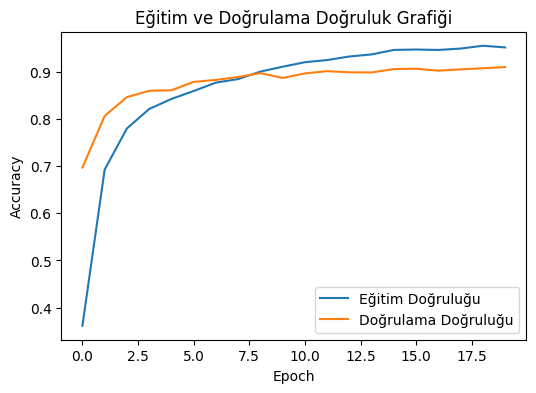

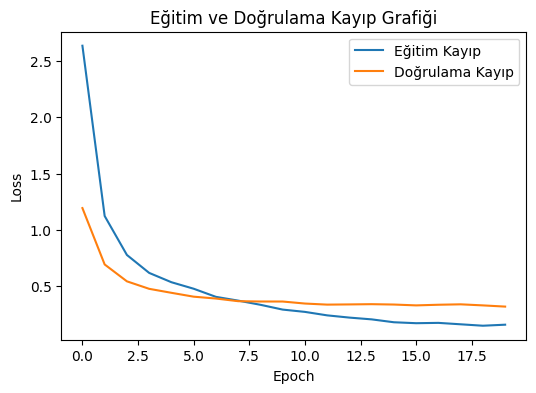

In [ ]:
import shutil
import os
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from google.colab import drive

print("--- MODÜL A (TÜR TANIMA) HIZLANDIRILMIŞ KURULUM ---")

# 1. DRIVE BAĞLANTISI
drive.mount('/content/drive')

# 2. VERİLERİ HIZLI HAFIZAYA TAŞIMA (TURBO MOD)
# Drive'daki yavaş klasör
drive_source = '/content/drive/MyDrive/PLANT_CARE_AI/1_TUR_TANIMA_EGITIM_VERISETI'
# Colab içindeki hızlı klasör (Yeni isim verdim karışmasın)
local_dest = '/content/veriseti_hizli_tur'

print(f"⏳ Veriler kopyalanıyor... Lütfen bekleyin (Bu işlem eğitimi 10 kat hızlandıracak)")

if not os.path.exists(local_dest):
    try:
        shutil.copytree(drive_source, local_dest)
        print("✅ Kopyalama Tamamlandı! Veriler artık RAM hızında okunacak. 🚀")
    except Exception as e:
        print(f"❌ Kopyalama Hatası: {e}")
        print("Mecburen yavaş modda (Drive üzerinden) devam edilecek.")
        local_dest = drive_source # Hata olursa eski yola dön
else:
    print("✅ Veriler zaten hızlı hafızada mevcut. Hız kesmeden devam! 🏎️")

# 3. VERİ HAZIRLAMA (Hızlı Yoldan)
print("EfficientNetB0 için veriler hazırlanıyor...")

datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    local_dest, # HIZLI YOL
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    local_dest, # HIZLI YOL
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

num_classes = len(train_generator.class_indices)
print(f"Tespit edilen tür sayısı: {num_classes}")

# 4. MODEL: EFFICIENTNET-B0 (GÜÇLENDİRİLMİŞ)
print("Model kuruluyor...")
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# İnce Ayar: Son 30 katmanı serbest bırak
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 5. EĞİTİM AYARLARI
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1),
    ModelCheckpoint('/content/drive/MyDrive/PLANT_CARE_AI/modul_A_guclu_efficientnet.keras',
                    monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)
]

# 6. BAŞLAT
print("🚀 EĞİTİM BAŞLIYOR...")
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=callbacks,
    verbose=1
)

# 7. FİNAL
loss, acc = model.evaluate(validation_generator)
print(f"\n✅ YENİ MODÜL A SKORU: %{acc*100:.2f}")


import matplotlib.pyplot as plt

# Accuracy grafiği
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluk Grafiği')
plt.show()

# Loss grafiği
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Eğitim Kayıp')
plt.plot(history.history['val_loss'], label='Doğrulama Kayıp')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Eğitim ve Doğrulama Kayıp Grafiği')
plt.show()
